In [1]:
library("dplyr")
library(tidyverse)
library(readxl)
library(plm)
library(dlm)
library(ggplot2)
library(zoo)
library(lattice)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v stringr 1.4.0
v tidyr   1.0.0     v forcats 0.4.0
v readr   1.3.1     
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'read

In [6]:
df1 <- read_csv("SLB.csv")
glimpse(df1)
head(df1)
tail(df1)

Parsed with column specification:
cols(
  Date = col_character(),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)


Observations: 8,569
Variables: 7
$ Date        <chr> "12/31/1985", "1/2/1986", "1/3/1986", "1/6/1986", "1/7/...
$ Open        <dbl> 9.12500, 9.15625, 9.00000, 9.06250, 9.18750, 9.40625, 9...
$ High        <dbl> 9.25000, 9.18750, 9.09375, 9.21875, 9.43750, 9.43750, 9...
$ Low         <dbl> 9.06250, 8.90625, 8.96875, 9.03125, 9.18750, 9.15625, 8...
$ Close       <dbl> 9.12500, 9.00000, 9.06250, 9.15625, 9.40625, 9.25000, 9...
$ `Adj Close` <dbl> 1.371067, 1.352285, 1.361677, 1.375763, 1.413326, 1.389...
$ Volume      <dbl> 3067600, 1694000, 1395200, 2134000, 3030400, 4520000, 3...


Date       Open    High    Low     Close   Adj Close Volume 
1 12/31/1985 9.12500 9.25000 9.06250 9.12500 1.371067  3067600
2 1/2/1986   9.15625 9.18750 8.90625 9.00000 1.352285  1694000
3 1/3/1986   9.00000 9.09375 8.96875 9.06250 1.361677  1395200
4 1/6/1986   9.06250 9.21875 9.03125 9.15625 1.375763  2134000
5 1/7/1986   9.18750 9.43750 9.18750 9.40625 1.413326  3030400
6 1/8/1986   9.40625 9.43750 9.15625 9.25000 1.389849  4520000

Date       Open  High  Low   Close Adj Close Volume  
1 12/19/2019 39.59 39.83 39.48 39.61 39.61      7048600
2 12/20/2019 39.93 39.97 39.18 39.43 39.43     13465800
3 12/23/2019 39.44 40.89 39.43 40.79 40.79      9911300
4 12/24/2019 40.74 40.93 40.35 40.65 40.65      3860400
5 12/26/2019 40.86 40.88 39.93 40.07 40.07      7629700
6 12/27/2019 40.13 40.38 39.83 40.00 40.00      6769100

In [3]:
colSums(is.na(df1)) # checking missing values

Date      Open      High       Low     Close Adj Close    Volume 
        0         0         0         0         0         0         0

In [4]:
str(df1) # structure of data set

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	8569 obs. of  7 variables:
 $ Date     : chr  "12/31/1985" "1/2/1986" "1/3/1986" "1/6/1986" ...
 $ Open     : num  9.12 9.16 9 9.06 9.19 ...
 $ High     : num  9.25 9.19 9.09 9.22 9.44 ...
 $ Low      : num  9.06 8.91 8.97 9.03 9.19 ...
 $ Close    : num  9.12 9 9.06 9.16 9.41 ...
 $ Adj Close: num  1.37 1.35 1.36 1.38 1.41 ...
 $ Volume   : num  3067600 1694000 1395200 2134000 3030400 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Open = col_double(),
  ..   High = col_double(),
  ..   Low = col_double(),
  ..   Close = col_double(),
  ..   `Adj Close` = col_double(),
  ..   Volume = col_double()
  .. )


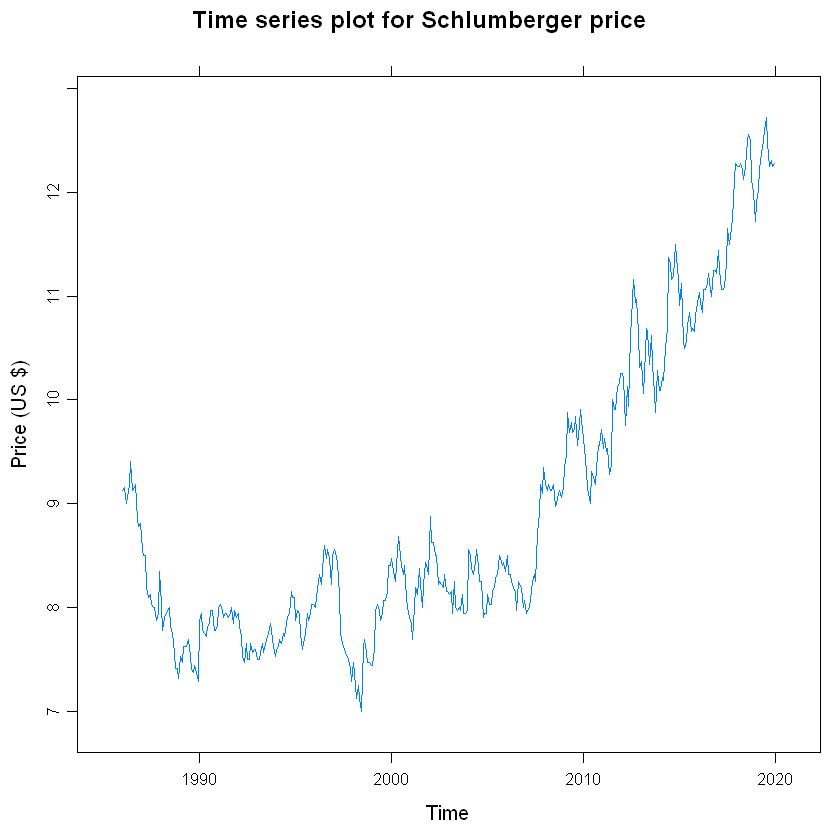

In [7]:
df1 = ts(df1$Open, start= c(1986,1), end = c(2019,12), frequency = 12)
xyplot(df1, ylab = "Price (US $)", main = "Time series plot for Schlumberger price")

In [6]:
library(pastecs)

Warning message:
"package 'pastecs' was built under R version 3.6.2"
Attaching package: 'pastecs'

The following object is masked from 'package:tidyr':

    extract

The following objects are masked from 'package:dplyr':

    first, last



## Autocorrelation Function (ACF)
### Identify if correlation at different time lags goes to 0
The stationary = Guassian noise and one with a trend = cummulative sum of Gaussian noise
We will check each for characteristics of stationarity by looking at the autocorrelation functions of each signal. We would expect the ACF to go to 0 for each time lag (τ) for a stationary signal, because we expect no dependence with time. 

In [7]:
df1_stationary <- rnorm(length(df1), mean=1, sd=1) # the stationary time series using mean & std
df1_trend <- cumsum(rnorm(length(df1), mean=1, sd=4)) + df1/100 # time series with a trend

# normalize each trend & starionary
df1_stationary <- df1_stationary / max(df1_stationary) 
df1_trend <- df1_trend / max(df1_trend)

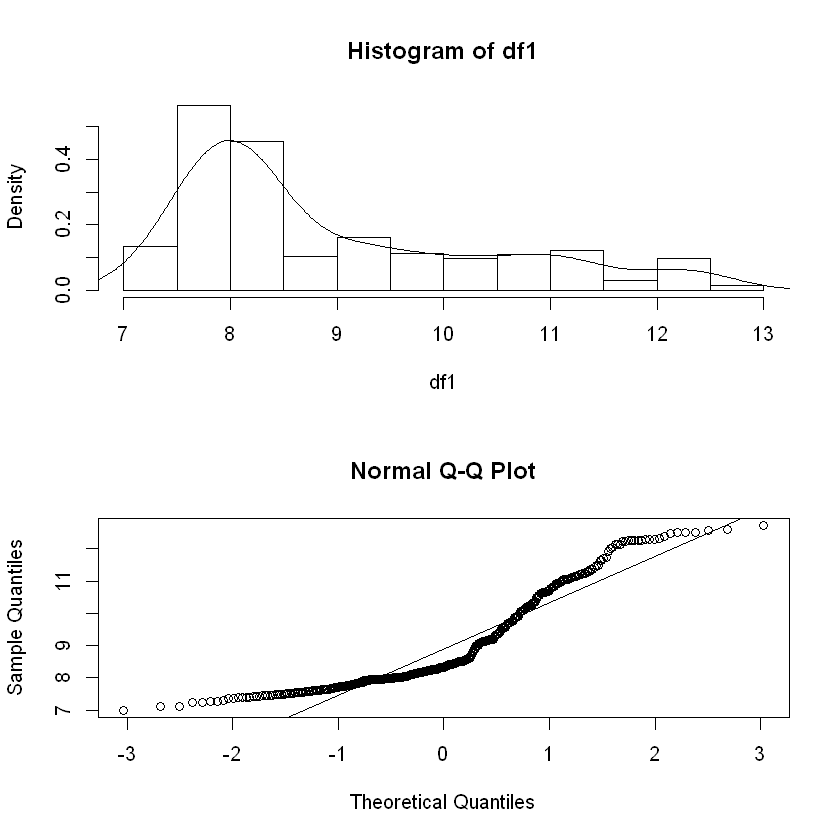

In [8]:
par(mfrow=c(2,1))        # set up the graphics 
hist(df1, prob=TRUE, 12)   # histogram    
lines(density(df1))     # density for details 
qqnorm(df1)             # normal Q-Q plot  
qqline(df1)  

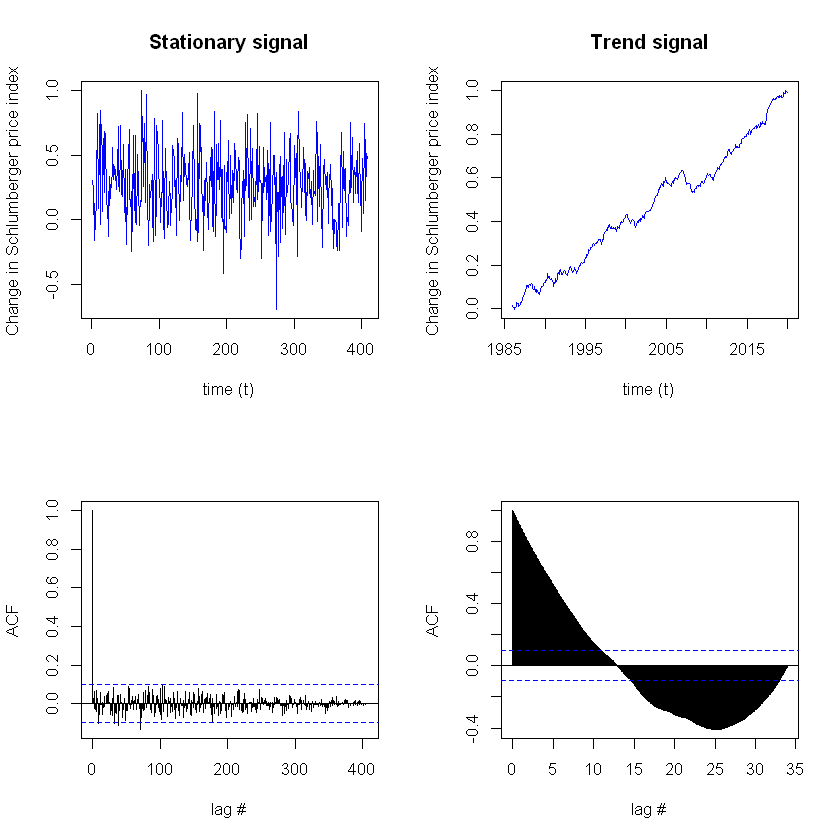

In [9]:
plot.new()
frame()
par(mfcol=c(2,2))

# the stationary signal and ACF
plot(df1_stationary,
     type='l', col='blue',
     xlab = "time (t)",
     ylab = "Change in Schlumberger price index",
     main = "Stationary signal")
acf(df1_stationary, lag.max = length(df1_stationary),
         xlab = "lag #", ylab = 'ACF',main=' ')

# the trend signal and ACF
plot(df1_trend,
     type='l',col='blue',
     xlab = "time (t)",
     ylab = "Change in Schlumberger price index",
     main = "Trend signal")
acf(df1_trend, lag.max = length(df1_trend),
         xlab = "lag #", ylab = 'ACF', main=' ')

we can see here that, the stationary signal (top left) resulted in few significant lags that exceed the CI of the ACF (blue dashed line, bottom left) . In comparison, the time series with a trend (top right) results in almost all lags exceeding the confidence interval of the ACF (bottom right). However, it can be see that, the exceeded lags normalized in due course and can be concluded from the ACFs that the signal is stationary. But, the signal on the right is not stationary and the later lags exceed the confidence interval.

In [10]:
library(tseries)
library(lubridate)
library(aTSA)

Warning message:
"package 'tseries' was built under R version 3.6.2"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'aTSA'

The following objects are masked from 'package:tseries':

    adf.test, kpss.test, pp.test

The following object is masked from 'package:pastecs':

    trend.test

The following object is masked from 'package:graphics':

    identify



In [11]:
stationary.test(df1, method = "adf")
stationary.test(df1, method = "pp") # same as pp.test(x)
stationary.test(df1, method = "kpss")

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 0.843   0.887
[2,]   1 0.886   0.899
[3,]   2 0.937   0.906
[4,]   3 0.924   0.904
[5,]   4 0.864   0.893
[6,]   5 1.024   0.917
Type 2: with drift no trend 
     lag     ADF p.value
[1,]   0 -0.1706   0.936
[2,]   1 -0.0728   0.950
[3,]   2 -0.0496   0.952
[4,]   3 -0.0435   0.952
[5,]   4 -0.0883   0.947
[6,]   5  0.3066   0.978
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -2.84   0.224
[2,]   1 -2.83   0.228
[3,]   2 -2.72   0.272
[4,]   3 -2.79   0.242
[5,]   4 -2.96   0.172
[6,]   5 -2.96   0.173
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   5 0.343   0.768
----- 
 Type 2: with drift no trend 
 lag   Z_rho p.value
   5 -0.0692   0.953
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   5 -11.6   0.386
--------------- 
Note:

### Normalizaion

In [12]:
df1_stationary <- rnorm(length(df1), mean=1, sd=1) # the stationary time series using mean & std
df1_trend <- cumsum(rnorm(length(df1), mean=1, sd=4)) + df1/100 # time series with a trend

# normalize each trend & starionary
df1_stationary <- df1_stationary / max(df1_stationary) 
df1_trend <- df1_trend / max(df1_trend)

In [13]:
stationary.test(df1_stationary, method = "adf")
stationary.test(df1_stationary, method = "pp") # same as pp.test(x)
stationary.test(df1_stationary, method = "kpss")

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -11.43    0.01
[2,]   1  -7.14    0.01
[3,]   2  -5.22    0.01
[4,]   3  -4.13    0.01
[5,]   4  -3.32    0.01
[6,]   5  -2.87    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -19.46    0.01
[2,]   1 -13.84    0.01
[3,]   2 -11.37    0.01
[4,]   3  -9.85    0.01
[5,]   4  -8.61    0.01
[6,]   5  -7.86    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -19.45    0.01
[2,]   1 -13.83    0.01
[3,]   2 -11.36    0.01
[4,]   3  -9.84    0.01
[5,]   4  -8.60    0.01
[6,]   5  -7.85    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   5  -233    0.01
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   5  -397    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   5  -397    0.01
--------------- 
No

The differenced series has a better variance around the mean level, and the peaks are evidence of the interventions in the orignal series. The p value of the dickey fuller test is significant and is now 0.01 and hence the series is now stationary.

Let us decompose the time series to remark on the seasonal, trend and remainder effects on the series.

### Decomposing Time Series
Decomposing a time series means separating it into it’s constituent components, which are often a trend component and a random component, and if the data is seasonal, a seasonal component. Decomposing the time series involves tying to separate the time series into these individual components.

Let's use simple moving average smoothing method of the time series to estimate the trend component.

In [15]:
library("TTR")

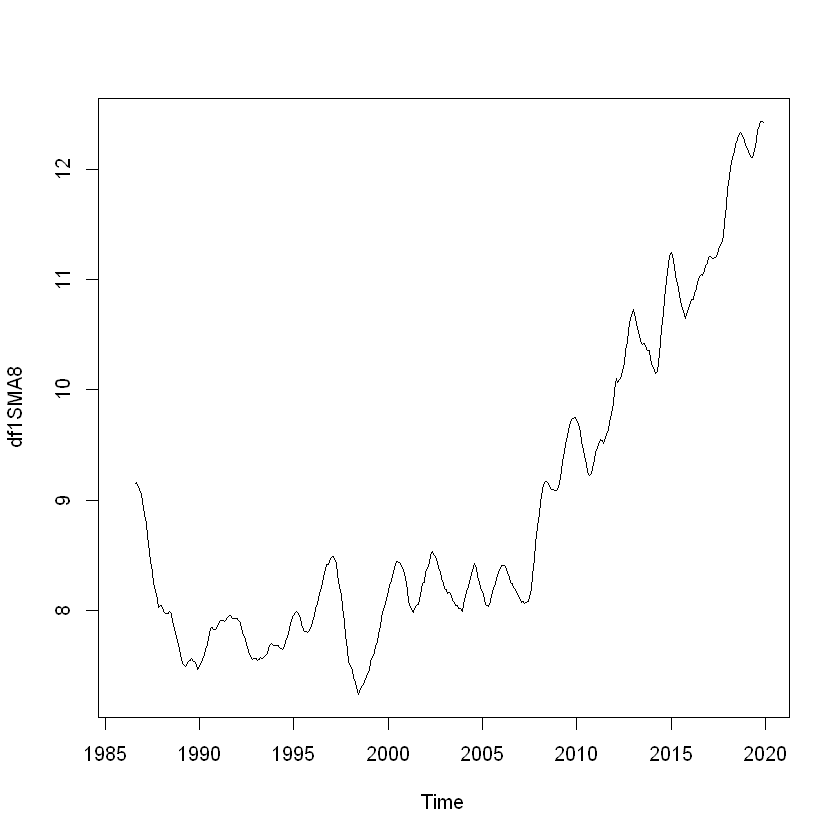

In [16]:
df1SMA8 <- SMA(df1, n=8) # smoothing with moving average 8
plot.ts(df1SMA8)


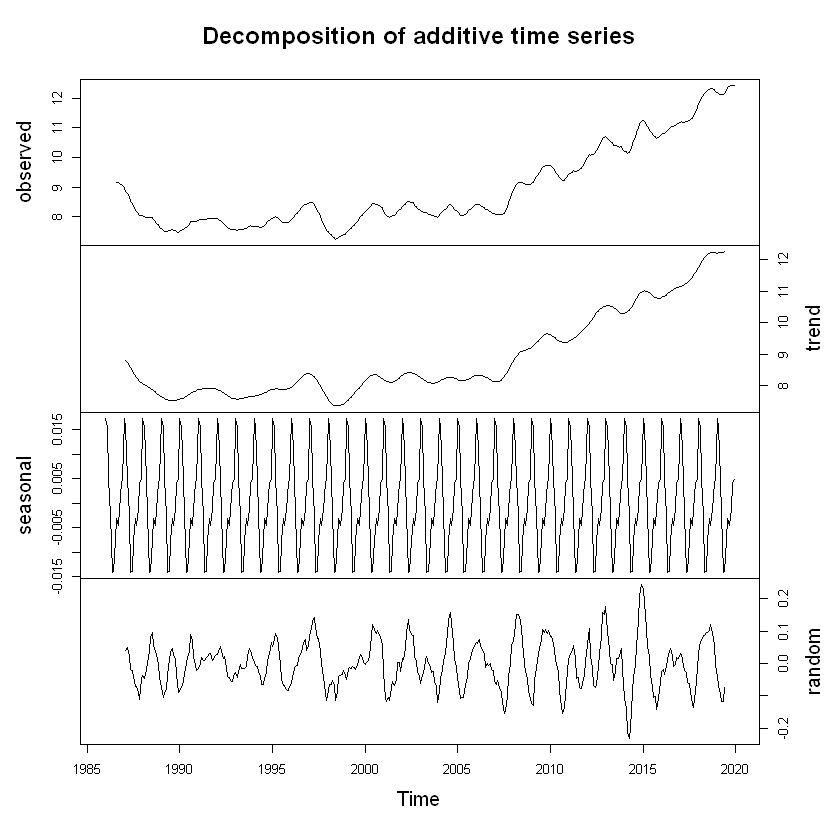

In [17]:
df1Comp <- decompose(df1SMA8) # decomposing
plot(df1Comp, yax.flip=TRUE)

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom). 

We see that the estimated trend component shows a small decrease from about 9 in 1997 to about 7 in 1999, followed by a steady increase from then on to about 12 in 2019.

### Seasonally Adjusting


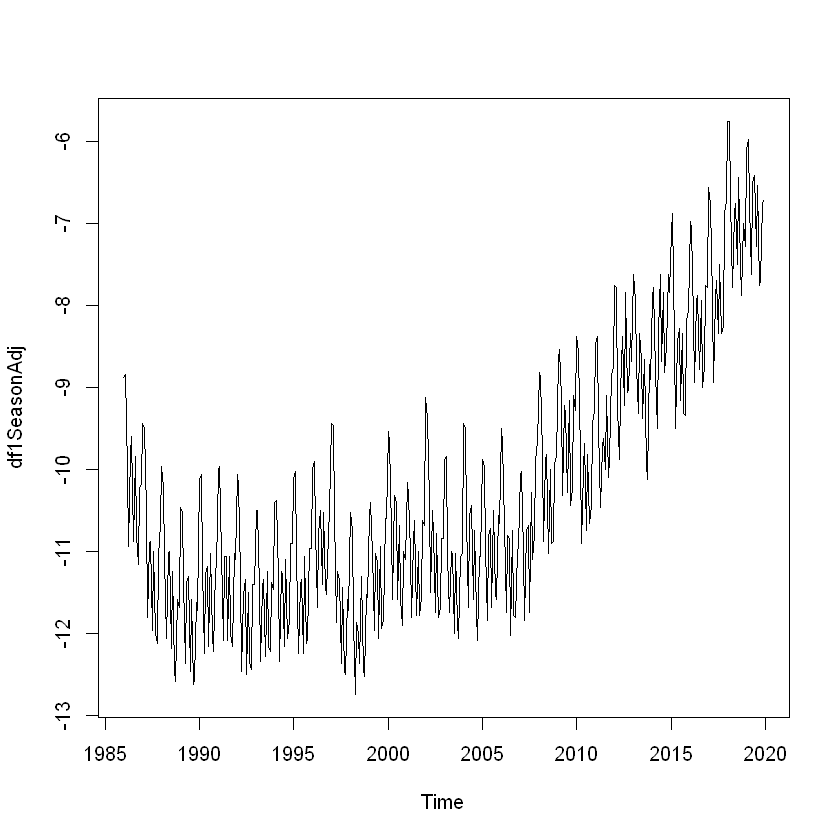

In [18]:
df1.Comp.seasonal <- sapply(df1Comp$seasonal, nchar)
df1SeasonAdj <- df1 - df1.Comp.seasonal
plot.ts(df1SeasonAdj)

We break up the trend effect with the monthplot to understand the trends over the month.

In [39]:
library(lubridate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [338]:
df1 <- read_csv("SLB.csv")

Parsed with column specification:
cols(
  Date = col_character(),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  `Adj Close` = col_double(),
  Volume = col_double()
)


If we chcek the statistic of both the variables we see the mean and standard
deviation are aound 0,1 which establishes the fact that we may not need to standardize rescales the values.

In [24]:
stat.desc(df1, basic=TRUE, desc=TRUE, norm=TRUE, p=0.95)

x            
nbr.val       4.080000e+02
nbr.null      0.000000e+00
nbr.na        0.000000e+00
min           7.000000e+00
max           1.271875e+01
range         5.718750e+00
sum           3.653438e+03
median        8.312500e+00
mean          8.954504e+00
SE.mean       7.068832e-02
CI.mean.0.95  1.389598e-01
var           2.038710e+00
std.dev       1.427834e+00
coef.var      1.594543e-01
skewness      9.928198e-01
skew.2SE      4.108498e+00
kurtosis     -1.702049e-01
kurt.2SE     -3.530192e-01
normtest.W    8.655703e-01
normtest.p    2.745696e-18

- nbr.val = the number of values, 
- nbr.null = the number of null values, 
- nbr.na = the number of missing values, 
- min = the minimal value, 
- max = the maximal value, 
- range = the range (that is, max-min)
- sum = the sum of all non-missing values 
- the median (median), 
- the mean (mean), 
- SE.mean = the standard error on the mean, 
- CI.mean = the confidence interval of the mean at the p level, 
- the variance (var), 
- the standard deviation (std.dev) 
- the variation coefficient (coef.var) defined as the standard deviation divided by the mean
- skewness = the skewness coefficient g1, its significant criterium (skew.2SE, that is, g1/2.SEg1; if skew.2SE > 1, then skewness is significantly different than zero), 
- kurtosis = kurtosis coefficient g2, its significant criterium (kurt.2SE, same remark than for skew.2SE), 
- normtest.W = the statistic of a Shapiro-Wilk test of normality and its associated probability (normtest.p)
- p = the probability level to use to calculate the confidence interval on the mean (CI.mean). By default, p=0.95

In [35]:
library(aTSA)


Attaching package: 'aTSA'

The following object is masked from 'package:pastecs':

    trend.test

The following objects are masked from 'package:tseries':

    adf.test, kpss.test, pp.test

The following object is masked from 'package:graphics':

    identify



We are going to apply State space model (SSM) which refers to a class of probabilistic graphical model (Koller and Friedman, 2009) that describes the probabilistic dependence between the latent state variable and the observed measurement. SSM in fact serves as an umbrella for representing many univariate, multivariate stationary and non stationary time series. 
SSM provides a general framework for analyzing deterministic and stochastic dynamical systems that are measured or observed through a stochastic process. If you are interested, may visit http://www.scholarpedia.org/article/State_space_model to know more.

In [112]:
install.packages('dlm')

package 'dlm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpYXxg9G\downloaded_packages


In [19]:
library(dlm)

In [20]:
library(plm)

In [21]:
library('TSstudio')

Warning message:
"package 'TSstudio' was built under R version 3.6.2"

In [22]:
split_df1 <- ts_split(ts.obj = df1, sample.out = 12)

training <- split_df1$train
testing <- split_df1$test

length(df1)

length(training)
length(testing)

[1] 408

[1] 396

[1] 12

In [23]:
df1.train <- StructTS(training, type = c("BSM"), init=NULL,
                      fixed = NULL, optim.control = NULL)
df1.train


Call:
StructTS(x = training, type = c("BSM"), init = NULL, fixed = NULL, optim.control = NULL)

Variances:
    level      slope       seas    epsilon  
1.135e-02  1.882e-03  4.772e-06  5.930e-03  

The maximum likelihood estimates (MLEs) of the level and observation error variances, 0.028947 and 0.0012839, respectively

- level variance of the level disturbances
- slope variance of the slope disturbances
- seas variance of the seasonal disturbances
- epsilon variance of the observation disturbances

In [30]:
#df1.train %>%
#  forecast(h=60) %>%
#  autoplot() + autolayer(testing)

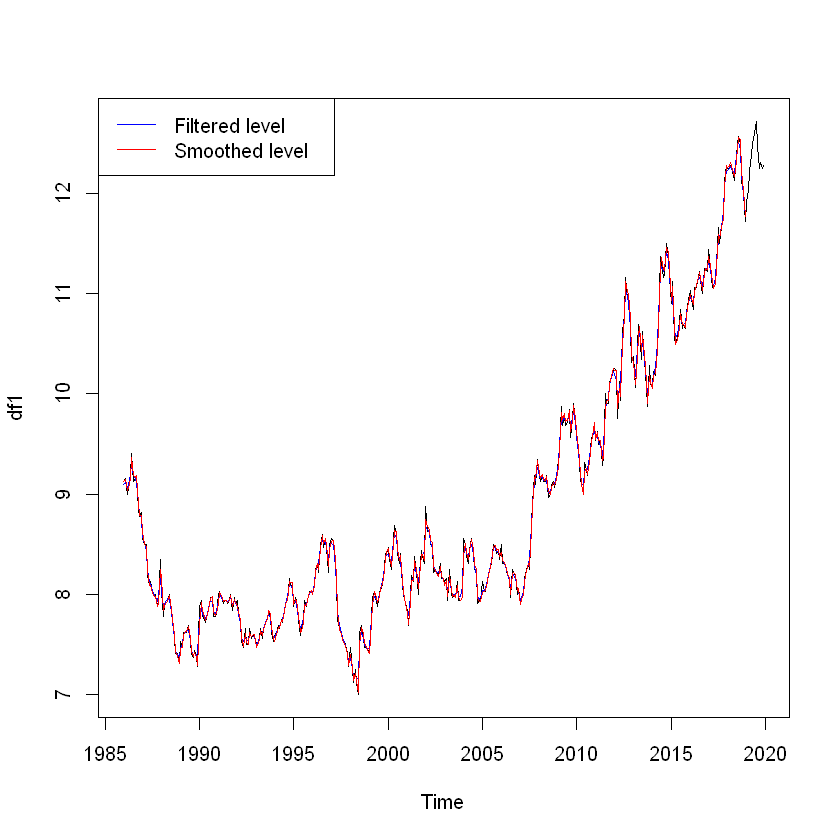

In [24]:
sm <- tsSmooth(df1.train)
plot(df1)
lines(sm[,1],col='blue')
lines(fitted(df1.train)[,1],col='red')

# Seasonally adjusted data
training.sa <- df1 - sm[, 1]
lines(training.sa, col='black')
legend("topleft",col=c('blue','red', 'black'),lty=1,
       legend=c("Filtered level","Smoothed level"))

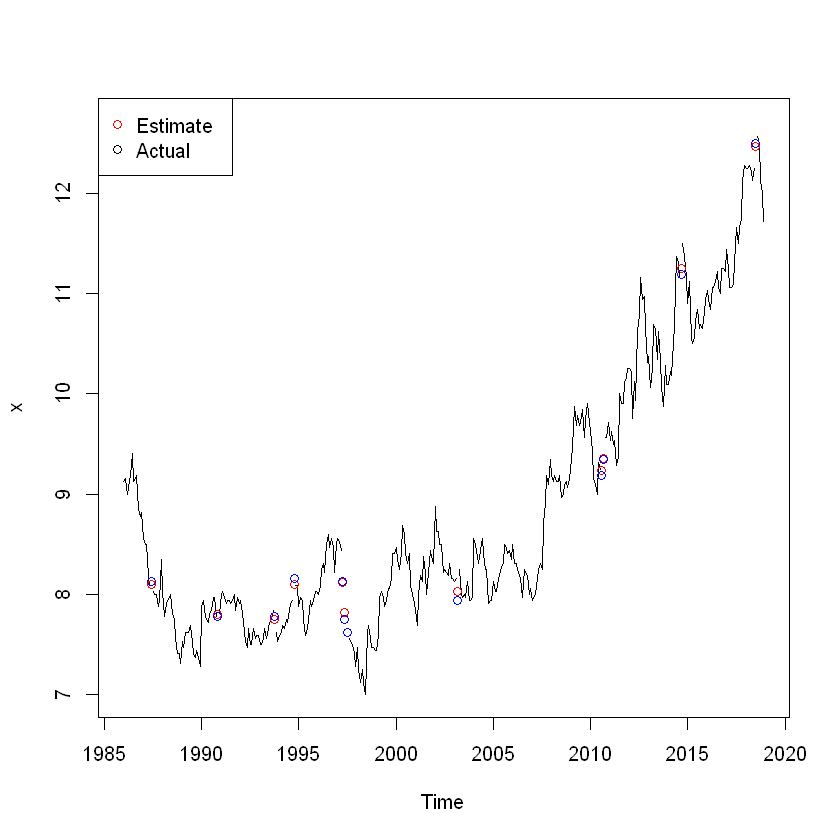

In [25]:
x <- training
miss <- sample(1:length(x), 12)
x[miss] <- NA
estim <- sm[,1]+sm[,3]
plot(x, ylim=range(df1))
points(time(x)[miss], estim[miss],
col='red', pch=1)
points(time(x)[miss], df1[miss],
col='blue', pch=1)
legend("topleft", pch=1, col=c(2,1),
       legend=c("Estimate","Actual"))


StructTS has the advantage of being of simple usage
and quite reliable. It gives the main tools for fitting a structural model for a time series by
maximum likelihood; the options "level", "trend", "BSM" are used to fit a local level model,
a local linear trend, or a local trend with an additional seasonal component (“basic structural
model”). The Nile river data are included in any standard distribution of R as a time series
object (i.e., a vector containing the data together with information about start/end time and
sampling frequency); a detailed description of the data is given in the help file, ?Nile. Thus,
there is no need to read them in and one can proceed to fit the model.

In [29]:
library(forecast)


Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: 'forecast'

The following object is masked from 'package:aTSA':

    forecast



The maximum likelihood estimates (MLEs) of the level and observation error variances, 0.028947
and 0.0012839, respectively

- level variance of the level disturbances 
- slope variance of the slope disturbances 
- seas variance of the seasonal disturbances
- epsilon variance of the observation disturbances

In [31]:
modelcv <- CVar(training, k=5, lambda=0.15)
print(modelcv)

Series: training 
Call:   CVar(y = training, k = 5, lambda = 0.15)

5-fold cross-validation
                   Mean         SD
ME        -0.0009025331 0.01965167
RMSE       0.1789185751 0.01579972
MAE        0.1335001412 0.01324993
MPE       -0.0138743325 0.22007418
MAPE       1.5039520203 0.16205943
ACF1       0.0183275344 0.07541666
Theil's U  1.0676841066 0.16275443

p-value of Ljung-Box test of residuals is  0.154971 
if this value is significant (<0.05),
the result of the cross-validation should not be used
as the model is underfitting the data.


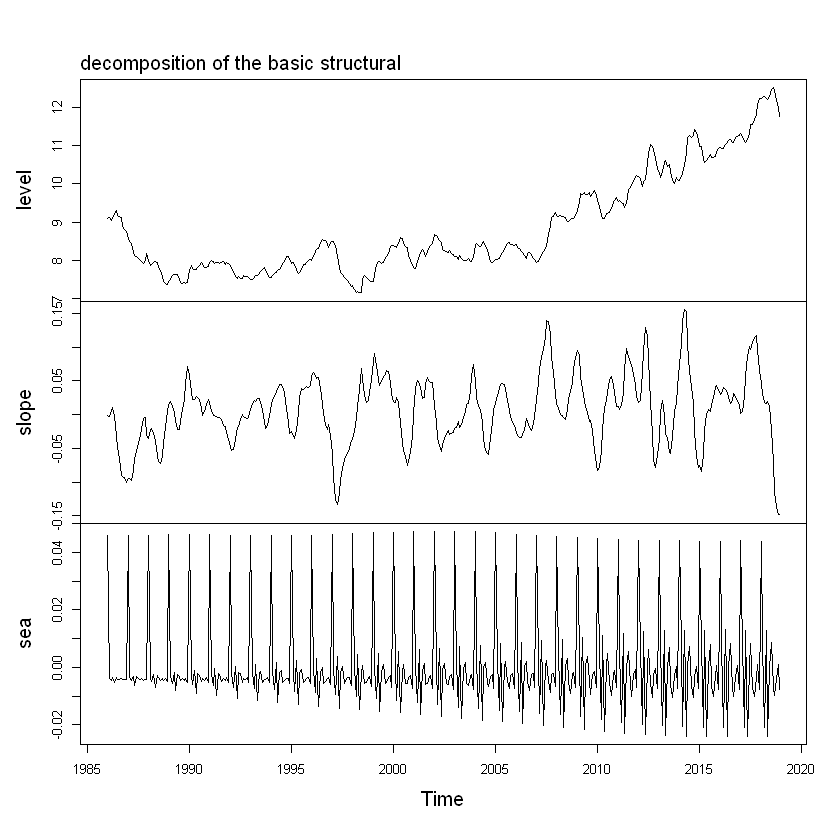

In [27]:
plot(sm, main = "")
mtext(text = "decomposition of the basic structural"
     , side = 3, adj = 0, line = 1)

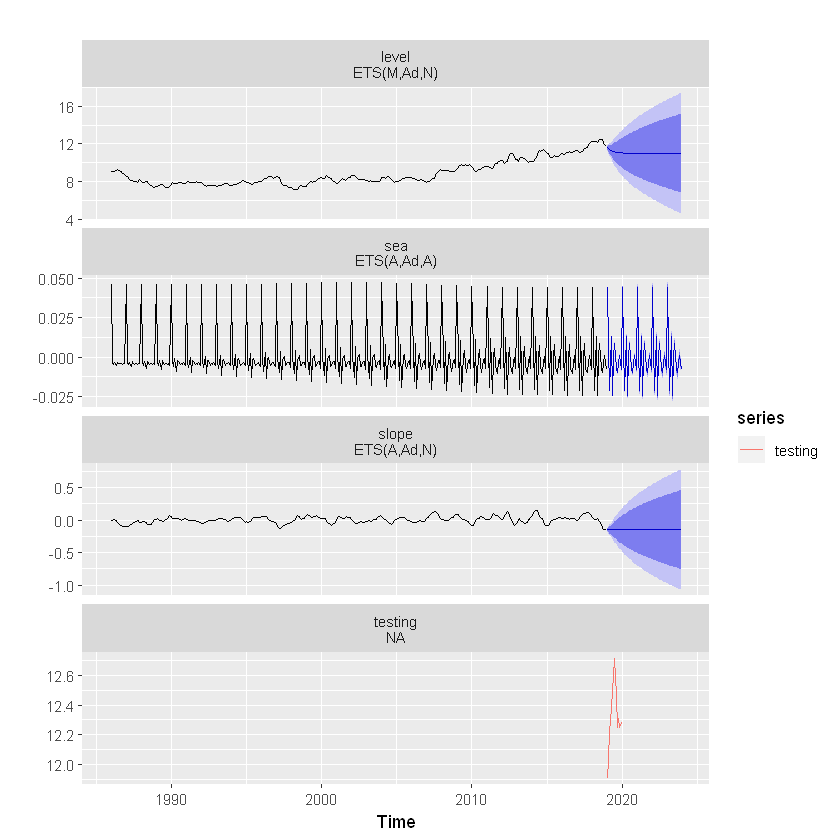

In [30]:
sm %>%
  forecast(h=60) %>%
  autoplot() + autolayer(testing)

is the expected value of yt + 1 (in this case y11) since we set t = 10) given the data up to yt (in this case, up to y10). It is called the one-step ahead prediction.
We are not going to use the one-step ahead predictions unless we are forecasting or doing cross-validation.

The maximum likelihood estimates (MLEs) of the level and observation error variances, 0.3502
and 4.0170, respectively, are included in the output, fit1 as fit1$coef. However,
asymptotic standard errors are not provided. The time series of the filtered estimates of the level,
at|t = E(αt|y1:t), t = 1, . . . , n, is obtained by applying the fitted method function2
to the object fitNile (of class StructTS). For the local level model, these coincide with the one-stepahead forecasts ˆyt+1 = E(yt+1|y1:t). Similarly, smoothed estimates are obtained by applying
the method function tsSmooth; however, standard errors of the estimates, and auxiliary
residuals, are not provided. Filtered and smoothed estimates are shown in Figure 1.

Below plot shows the forecasted crude oil (df1) data until 2020, togeher with 50% and 90% probability intervals.

In [36]:
#plot_forecast_errors <- function(forecasterrors)
#{
#    binsize <- IQR(forecasterrors, na.rm=TRUE)/4
#    sd <- sd(forecasterrors, na.rm=TRUE)
#    min <- min(forecasterrors, na.rm=TRUE) - sd*5
#    max <- max(forecasterrors, na.rm=TRUE) + sd*3
#    norm <- rnorm(10000, mean=0, sd=sd)
#    min2 <- min(norm)
#    max2 <- max(norm)
#    if (min2 < min) {min <- min2}
#    if (max2 > max) {max <- max2}
    
#    bins <- seq(min, max, binsize)
#    hist(forecasterrors, col='blue', freq=FALSE, breaks = bins)
#    points(hist$midst, hist$density,type ="1", col='black', lwd = 2)
#}

#plot_forecast_errors(sm$residuals) 

The forecast error plot above shows that the distribution of forecast errors is roughly centered on zero, and is more or less normally distributed.
The Ljung-Box test showed that there is little evidence of non-zero auto-correlations in the in-sample forecast errors, and the distribution of forecast errors seems to be normally distributed with mean zero. 


This suggests that the basic level structural method provides an adequate predictive predictive power for our data-set. Furthermore, the assumptions that the 80% and 95% predictions intervals were based upon (that there are no auto-correlations in the forecast errors, and the forecast errors are normally distributed with mean zero and constant variance) are probably valid.

In [114]:
install.packages('fpp')

also installing the dependencies 'fma', 'expsmooth'



package 'fma' successfully unpacked and MD5 sums checked
package 'expsmooth' successfully unpacked and MD5 sums checked
package 'fpp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpITBSWW\downloaded_packages


In [116]:
library(fpp)

In [297]:
e <- tsCV(df1, rwf, drift=TRUE, h=1)

mean(e, na.rm = TRUE) # mean error
sqrt(mean(e ^ 2, na.rm = TRUE)) ## root mean square error model
mean(abs(e), na.rm = TRUE) # mean absolute error of z regressor model
sqrt(mean(residuals(rwf(e, drift=TRUE))^2, na.rm=TRUE))

[1] 0.01552438

[1] 0.1786941

[1] 0.1328173

[1] 0.2581834

The local level model with dlm
A polynomial DLM (a local level model is a polynomial DLM of order 1, a local linear trend
is a polynomial DLM of order 2), is easily defined in dlm through the function dlmModPoly.
For example, a local level model, with known variances equal to 0.3 and 0.01, say, is obtained
as


The parameters var1, var2, var3 and var4 are referred respectively to the variances of the disturbance term in the observation equation and in the level, slope and seasonal components.

Notice that the parameter estimates based on StructTS and stsm are the same, however, the estimated components look better in the latter case compared to those based on StructTS: the trend component is smoother with no fluctuations at the beginning of the sample and the variance of the seasonal component is more stable throughout time. 

V, W (covariance matrices of
the measurement and state equations, respectively), FF and GG (measurement equation matrix
and transition matrix respectively), and m0, C0 (prior mean and covariance matrix of the state
vector).


In [263]:
dlm <- dlm(FF = 1, V = 0.8, GG = 1, W = 0.1, m0 = 0, C0 = 100)

In [264]:
str(dlm)

List of 6
 $ m0: num 0
 $ C0: num [1, 1] 100
 $ FF: num [1, 1] 1
 $ V : num [1, 1] 0.8
 $ GG: num [1, 1] 1
 $ W : num [1, 1] 0.1
 - attr(*, "class")= chr "dlm"


In [266]:
library(stats)

## Basic diagnostics
The first diagnostic that you do with any statistical analysis is check that your residuals correspond to your assumed error structure. We have two types of errors in a univariate state-space model: process errors, the 
wt, and observation errors, the vt. They should not have a temporal trend. 

### model.residuals 
vt are the difference between the data and the predicted data at time t:
 - vt = yt − Zxt − a

In a state-space model, xt is stochastic and the model residuals are a random variable. 
yt is also stochastic, though often observed unlike xt. The model residual random variable is:
 - Vt = Yt − ZXt − a

The unconditional mean and variance of Vt is 0 and R

#### compute confidence intervals

In [200]:
mod.list.0 <- list(
    B=matrix(1),
    U=matrix(0),
    Q=matrix("q"),
    Z=matrix(1),
    A=matrix(0),
    R="diagonal and unequal", # "diagonal and unequal" means a diagonal matrix with each 
                              # diagonal element having a different value. 
    x0=matrix("mu"),
    tinitx=0 )

In [201]:
kem.0 <- MARSS(dat, model=mod.list.0, , control=list(maxit=5000))

Success! abstol and log-log tests passed at 1082 iterations.
Alert: conv.test.slope.tol is 0.5.
Test with smaller values (<0.1) to ensure convergence.

MARSS fit is
Estimation method: kem 
Convergence test: conv.test.slope.tol = 0.5, abstol = 0.001
Estimation converged in 1082 iterations. 
Log-likelihood: -5100.625 
AIC: 10207.25   AICc: 10207.28   
 
      Estimate
R.R   15649.18
Q.q       0.72
x0.mu   117.43
Initial states (x0) defined at t=0

Standard errors have not been calculated. 
Use MARSSparamCIs to compute CIs and bias estimates.



##### Here are the estimates, log-likelihood and AICc

In [202]:
c(coef(kem.0, type="vector"), LL=kem.0$logLik, AICc=kem.0$AICc)

R.R           Q.q         x0.mu            LL          AICc 
15649.1794264     0.7204156   117.4335515 -5100.6253912 10207.2803390

In [214]:
MARSSkf(kem.0, only.logLik=TRUE)


$logLik
[1] -5100.625

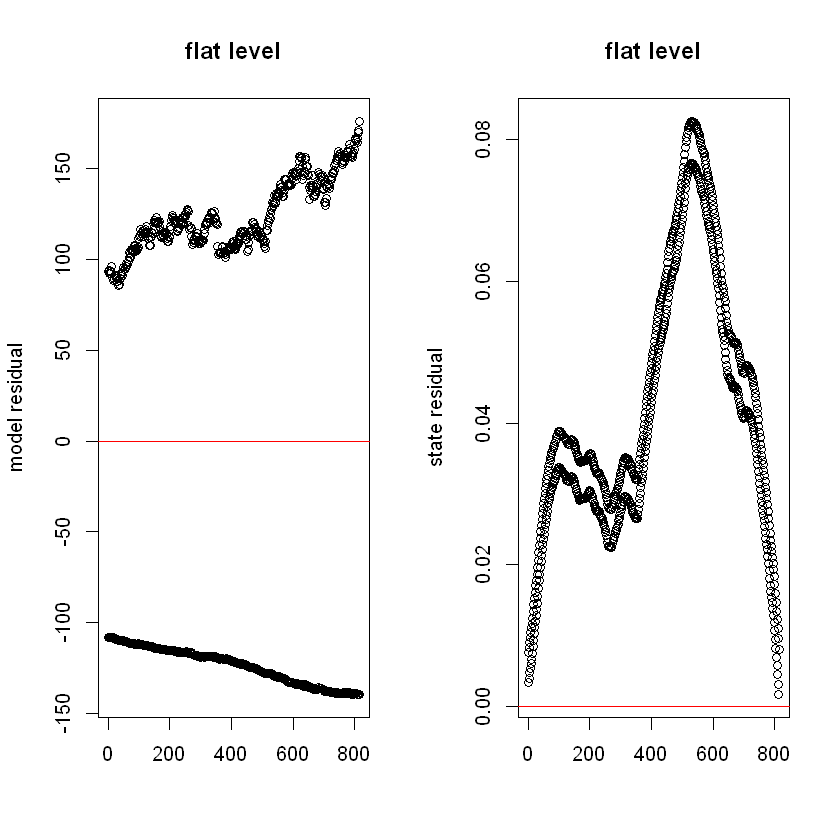

In [205]:
par(mfrow=c(1,2))
resids <- residuals(kem.0)
plot(resids$model.residuals[1,], 
   ylab="model residual", xlab="", main="flat level")
abline(h=0, col ='red')
plot(resids$state.residuals[1,], 
   ylab="state residual", xlab="", main="flat level")
abline(h=0, col='red')

It’s best practice to check the convergence of the MLE procedure. As with any MLE process we need to have appropriate initial starting points to ensure the algorithm will converge to the right maximum.

In [80]:
# forecasting using state sapce models
model.build <- function(p) {
    return(
      dlmModPoly(2, dV=p[1], dW=p[2:3]) +
      dlmModSeas(12, dV=p[4])
    )
}

In [81]:
# estimating the parameters
model.mle <- dlmMLE(training, parm=c(0.1, 0, 1, 1), build=model.build)
if(model.mle$convergence==0) print("converged") else print("did not converge")

[1] "converged"


In [82]:
model.mle$par

[1] -6.965193e-01  5.411563e-14  2.071981e-05  2.034807e-01

In [83]:
model.fit <- model.build(model.mle$par)

In [86]:
model.filtered <- dlmFilter(training, model.fit) # applying kalman filter

In [87]:
model.filtered

$y
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1986  9.12500  9.15625  9.00000  9.06250  9.18750  9.40625  9.12500  9.15625
1987  8.56250  8.50000  8.50000  8.18750  8.09375  8.12500  8.03125  8.00000
1988  8.03125  7.78125  7.90625  7.93750  7.96875  8.00000  7.81250  7.75000
1989  7.53125  7.46875  7.62500  7.62500  7.62500  7.68750  7.53125  7.40625
1990  7.87500  7.93750  7.78125  7.75000  7.71875  7.81250  7.84375  7.96875
1991  8.00000  8.03125  7.96875  7.90625  7.93750  7.93750  7.90625  7.93750
1992  7.93750  7.81250  7.71875  7.53125  7.46875  7.65625  7.50000  7.50000
1993  7.50000  7.50000  7.56250  7.65625  7.56250  7.65625  7.71875  7.75000
1994  7.59375  7.62500  7.68750  7.65625  7.75000  7.71875  7.84375  7.90625
1995  7.87500  7.96875  7.93750  7.75000  7.59375  7.65625  7.75000  7.93750
1996  8.00000  8.09375  8.25000  8.31250  8.21875  8.50000  8.59375  8.46875
1997  8.56250  8.53125  8.43750  8.12500  7.75000  7.65625  7.62500  7.56

In [88]:
# kalman smoother
model.smoothed <- dlmSmooth(training, model.fit)

In [89]:
model.smoothed

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

$s
              [,1]          [,2]          [,3]          [,4]          [,5]
Dec 1985  9.181839 -4.925025e-02  0.0157414106 -0.0773411433 -0.1236262283
Jan 1986  9.132589 -4.925025e-02 -0.0420983579  0.0157414106 -0.0773411433
Feb 1986  9.083339 -4.924872e-02  0.0093090344 -0.0420983541  0.0157414133
Mar 1986  9.034090 -4.924318e-02 -0.1024556970  0.0093090826 -0.0420983476
Apr 1986  8.984847 -4.923064e-02 -0.0724360893 -0.1024556773  0.0093090893
May 1986  8.935616 -4.920473e-02  0.0189017225 -0.0724361525 -0.1024557010
Jun 1986  8.886412 -4.915576e-02  0.2224792487  0.0189017339 -0.0724361667
Jul 1986  8.837256 -4.907120e-02 -0.0143455232  0.2224792628  0.0189017566
Aug 1986  8.788185 -4.893836e-02  0.0450464624 -0.0143455306  0.2224792662
Sep 1986  8.739246 -4.874364e-02  0.1208251286  0.0450464134 -0.0143455581
Oct 1986  8.690503 -4.847331e-02 -0.1236262346  0.1208250799  0.0450464163
Nov 1986  8.642029 -4.811572e-02 -0.0773411323 -0.1236262502  0.1208250699
Dec 1986  8.593914 -4.766178e-02  0.0857346208 -0.0773411271 -0.1236262608
Jan 1987  8.546252 -4.710590e-02 -0.0530842078  0.0857346394 -0.0773411073
Feb 1987  8.499146 -4.644516e-02 -0.0400365782 -0.0530842078  0.0857346394
Mar 1987  8.452701 -4.567785e-02  0.0536377364 -0.0400365782 -0.0530842078
Apr 1987  8.407023 -4.480423e-02 -0.0700650213  0.0536377364 -0.0400365782
May 1987  8.362219 -4.383059e-02 -0.0186520168 -0.0700650213  0.0536377364
Jun 1987  8.318388 -4.276743e-02  0.1015016549 -0.0186520168 -0.0700650213
Jul 1987  8.275621 -4.162712e-02  0.0185090826  0.1015016549 -0.0186520168
Aug 1987  8.233994 -4.042073e-02  0.0115408274  0.0185090826  0.1015016549
Sep 1987  8.193573 -3.915858e-02  0.0093436094  0.0115408274  0.0185090826
Oct 1987  8.154414 -3.784918e-02 -0.1434154264  0.0093436094  0.0115408274
Nov 1987  8.116565 -3.649825e-02 -0.1247981996 -0.1434154264  0.0093436094
Dec 1987  8.080067 -3.510809e-02  0.1966792611 -0.1247981996 -0.1434154264
Jan 1988  8.044959 -3.367586e-02  0.0070756540  0.1966792611 -0.1247981996
Feb 1988  8.011283 -3.220244e-02 -0.1274876144  0.0070756540  0.1966792611
Mar 1988  7.979080 -3.069214e-02  0.0152429065 -0.1274876144  0.0070756540
Apr 1988  7.948388 -2.914867e-02  0.0190348458  0.0152429065 -0.1274876144
May 1988  7.919240 -2.757328e-02  0.0559267758  0.0190348458  0.0152429065
Jun 1988  7.891666 -2.596624e-02  0.1368669205  0.0559267758  0.0190348458
Jul 1988  7.865700 -2.432875e-02  0.0216204037  0.1368669205  0.0559267758
Aug 1988  7.841371 -2.266396e-02  0.0292940600  0.0216204037  0.1368669205
Sep 1988  7.818707 -2.097692e-02 -0.0528523549  0.0292940600  0.0216204037
Oct 1988  7.797731 -1.927620e-02 -0.1331575842 -0.0528523549  0.0292940600
Nov 1988  7.778454 -1.757265e-02 -0.0920610944 -0.1331575842 -0.0528523549
Dec 1988  7.760882 -1.587804e-02 -0.1163978098 -0.0920610944 -0.1331575842
Jan 1989  7.745004 -1.420631e-02  0.0794605840 -0.1163978098 -0.0920610944
Feb 1989  7.730797 -1.256980e-02 -0.0197556044  0.0794605840 -0.1163978098
Mar 1989  7.718228 -1.097869e-02  0.0654380543 -0.0197556044  0.0794605840
Apr 1989  7.707249 -9.439639e-03  0.0378695134  0.0654380543 -0.0197556044
May 1989  7.697809 -7.957700e-03  0.0379700208  0.0378695134  0.0654380543
Jun 1989  7.689851 -6.537528e-03  0.1232088969  0.0379700208  0.0378695134
Jul 1989  7.683314 -5.184400e-03  0.0256288884  0.1232088969  0.0379700208
Aug 1989  7.678130 -3.905783e-03 -0.0276825931  0.0256288884  0.1232088969
Sep 1989  7.674224 -2.711939e-03 -0.0588219351 -0.0276825931  0.0256288884
Oct 1989  7.671512 -1.612972e-03 -0.0556685884 -0.0588219351 -0.0276825931
Nov 1989  7.669899 -6.163753e-04 -0.1202124129 -0.0556685884 -0.0588219351
Dec 1989  7.669282  2.705088e-04 -0.2456956400 -0.1202124129 -0.0556685884
Jan 1990  7.669553  1.041699e-03  0.1764944093 -0.2456956400 -0.1202124129
Feb 1990  7.670595  1.698412e-03  0.1543071899  0.1764944093 -0.2456956400
Mar 1990  7.672293  2.245380e-03  0.0242024183  0.1543071899  0.1764944093
Apr 1990  7.674538  2.

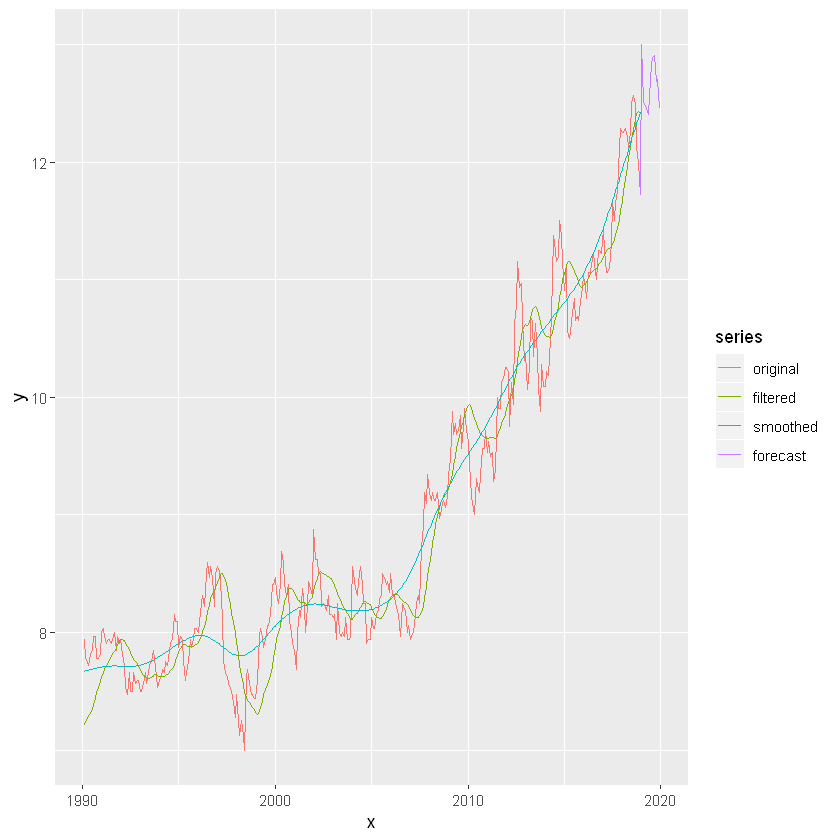

In [91]:
n <- 1*12
model.forecast <- dlmForecast(model.filtered, nAhead=n)
 
x <- index(training)
xf <- seq(max(x), max(x)+n/12, 1/12)
aa <- model.forecast$a[,-1]*(-1)
aa <- cbind(model.forecast$a[,1], aa)
a <- drop(model.forecast$a%*%t(FF(model.fit)))
a <- c(tail(training,1), a)
df <- rbind(
  data.frame(x=x, y=as.numeric(training), series="original"),
  data.frame(x=x, y=apply(model.filtered$m[-1,1:2], 1, sum), series="filtered"),
  data.frame(x=x, y=apply(model.smoothed$s[-1,1:2], 1, sum), series="smoothed"),
  data.frame(x=xf, y=a, series="forecast")
)
dlm <- ggplot(subset(df, x>1990), aes(x=x, y=y, colour=series)) + geom_line()
dlm
 

As you can see this forecasts fairly well. The filtered and smoothed series are pretty similar. Here we have ignored the seasonal components and just plot the trend components to demonstrate it’s utility.

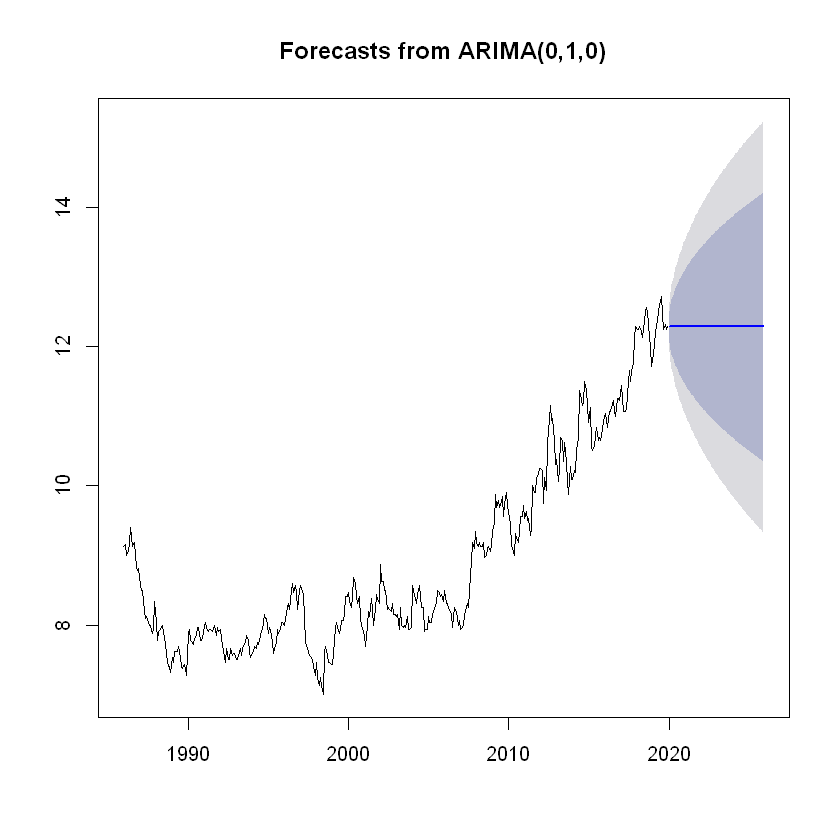

In [360]:
# forecasting using arima
model <- auto.arima(df1)
model.forecast <- forecast(model, h = 6*12)
plot(model.forecast)

Interestingly it doesn’t pick up on the seasonal component like the state space model. We could formulate the ARIMA model manually to improve on this (usually auto.arima does a pretty good job though).